In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import epgcpmg as epg
%matplotlib inline
pylab.rcParams['figure.figsize'] = 10, 4


/Users/jtamir/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [22]:
angles = np.loadtxt('../data/flipangles.txt.408183520')
angles = np.loadtxt('flipangles.txt.814192544')
angles_rad = angles * np.pi / 180.
T = len(angles_rad)
e2s = 2

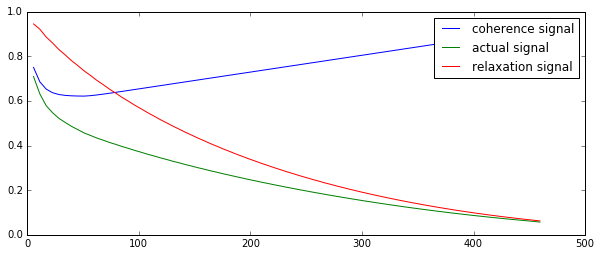

In [47]:
T1 = 1000e-3
T2 = 100e-3
TE = 5.672e-3

S_coherence = epg.FSE_signal(angles_rad, TE, 1000, 1000)
S_act = epg.FSE_signal(angles_rad, TE, T1, T2)

S_relax = S_act / S_coherence

echo_times = (1 + np.arange(T)) * TE

plt.plot(echo_times*1000, S_coherence, echo_times*1000, S_act, echo_times*1000, S_relax)
plt.ylim((0,1))
plt.legend(('coherence signal', 'actual signal', 'relaxation signal'));

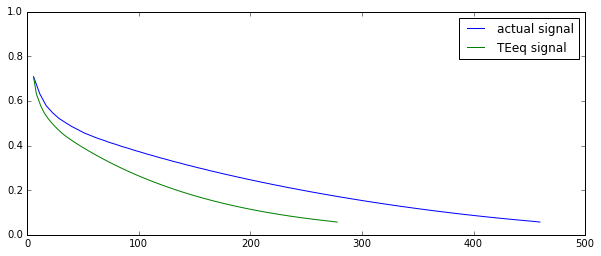

In [48]:
echo_times_eq = -T2 * np.log(S_act / S_coherence)
plt.plot(echo_times*1000, S_act, echo_times_eq*1000, S_act)
plt.ylim((0,1))
plt.legend(('actual signal', 'TEeq signal'));

In [49]:
def effective_TE(echo_times_eq, TE):
    idx = min(range(len(echo_times_eq)), key=lambda i: abs(echo_times_eq[i]-TE*1e-3)) # index of echo time
    return idx, echo_times_eq[idx]*1000

In [50]:
print effective_TE(echo_times_eq, 5)
print effective_TE(echo_times_eq, 10)
print effective_TE(echo_times_eq, 40)
print effective_TE(echo_times_eq, 80)
print effective_TE(echo_times_eq, 100)

(0, array([ 5.6714328]))
(1, array([ 8.21584019]))
(11, array([ 39.62363654]))
(25, array([ 80.6598468]))
(31, array([ 98.55033469]))


In [60]:
print 1000*echo_times_eq[2 + np.array([5,7,10,12,15,17,20,23,26,29])]

[[ 27.70952474]
 [ 33.70084241]
 [ 42.70566832]
 [ 48.55156371]
 [ 57.18466713]
 [ 63.03678852]
 [ 71.92459975]
 [ 80.6598468 ]
 [ 89.6548252 ]
 [ 98.55033469]]
